In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [11]:
# Read in the data and drop unnecessary columns
df = pd.read_csv('attacks.csv', encoding='cp1252')
df.drop(columns=['Case Number', 'Date', 'Year', 'Country', 'Area', 'Location', 'Name', 'Sex ', 
                 'Time', 'Investigator or Source','pdf', 'href', 'href formula', 'Case Number.1', 
                 'Case Number.2', 'Unnamed: 22', 'Unnamed: 23', 'original order'], inplace=True)
df


,Type,Activity,Age,Injury,Fatal (Y/N),Species
0,Boating,Paddling,57,"No injury to occupant, outrigger canoe and pad...",N,White shark
1,Unprovoked,Standing,11,Minor injury to left thigh,N,NaN
2,Invalid,Surfing,48,Injury to left lower leg from surfboard skeg,N,NaN
3,Unprovoked,Surfing,NaN,Minor injury to lower leg,N,2 m shark
4,Provoked,Free diving,NaN,Lacerations to leg & hand shark PROVOKED INCIDENT,N,"Tiger shark, 3m"
...,...,...,...,...,...,...
25718,NaN,NaN,NaN,NaN,NaN,NaN
25719,NaN,NaN,NaN,NaN,NaN,NaN
25720,NaN,NaN,NaN,NaN,NaN,NaN
25721,NaN,NaN,NaN,NaN,NaN,NaN


In [12]:
# Drop rows with all null values
df.dropna(how='all', inplace=True)
df

,Type,Activity,Age,Injury,Fatal (Y/N),Species
0,Boating,Paddling,57,"No injury to occupant, outrigger canoe and pad...",N,White shark
1,Unprovoked,Standing,11,Minor injury to left thigh,N,NaN
2,Invalid,Surfing,48,Injury to left lower leg from surfboard skeg,N,NaN
3,Unprovoked,Surfing,NaN,Minor injury to lower leg,N,2 m shark
4,Provoked,Free diving,NaN,Lacerations to leg & hand shark PROVOKED INCIDENT,N,"Tiger shark, 3m"
...,...,...,...,...,...,...
6297,Unprovoked,Diving,NaN,FATAL,Y,NaN
6298,Unprovoked,Pearl diving,NaN,FATAL,Y,NaN
6299,Unprovoked,Swimming,NaN,FATAL,Y,NaN
6300,Unprovoked,NaN,NaN,FATAL,Y,NaN


In [13]:
# Rename columns for clarity
df.rename(columns={'Type': 'type', 'Activity': 'activity', 'Age': 'age', 'Injury': 'injury',
                   'Fatal (Y/N)': 'was_fatal', 'Species ': 'species'}, inplace=True)
df


,type,activity,age,injury,was_fatal,species
0,Boating,Paddling,57,"No injury to occupant, outrigger canoe and pad...",N,White shark
1,Unprovoked,Standing,11,Minor injury to left thigh,N,NaN
2,Invalid,Surfing,48,Injury to left lower leg from surfboard skeg,N,NaN
3,Unprovoked,Surfing,NaN,Minor injury to lower leg,N,2 m shark
4,Provoked,Free diving,NaN,Lacerations to leg & hand shark PROVOKED INCIDENT,N,"Tiger shark, 3m"
...,...,...,...,...,...,...
6297,Unprovoked,Diving,NaN,FATAL,Y,NaN
6298,Unprovoked,Pearl diving,NaN,FATAL,Y,NaN
6299,Unprovoked,Swimming,NaN,FATAL,Y,NaN
6300,Unprovoked,NaN,NaN,FATAL,Y,NaN


In [14]:
# Filter out non-standard null values and clean up data
df.loc[df['type'].isin(['Boat', 'Boatomg']), 'type'] = 'Boating'
df.loc[df['type'] == 'Invalid', 'type'] = np.nan
df.loc[df['type'] == '', 'type'] = np.nan
df.loc[df['activity'] == '', 'activity'] = np.nan
df.loc[df['age'].isin([' ', '']), 'age'] = np.nan
df.loc[df['injury'] == 'unknown', 'injury'] = np.nan
df.loc[df['was_fatal'].isin(['y', 'Y']), 'was_fatal'] = True
df.loc[df['was_fatal'] == 'N', 'was_fatal'] = False
df.loc[df['was_fatal'].isin(['', 'UNKNOWN', 'M', '2017', ' N', 'N  ', 'N ']), 'was_fatal'] = np.nan
df.loc[df['species'].isin(['Invalid', '']), 'species'] = np.nan
df

,type,activity,age,injury,was_fatal,species
0,Boating,Paddling,57,"No injury to occupant, outrigger canoe and pad...",False,White shark
1,Unprovoked,Standing,11,Minor injury to left thigh,False,NaN
2,NaN,Surfing,48,Injury to left lower leg from surfboard skeg,False,NaN
3,Unprovoked,Surfing,NaN,Minor injury to lower leg,False,2 m shark
4,Provoked,Free diving,NaN,Lacerations to leg & hand shark PROVOKED INCIDENT,False,"Tiger shark, 3m"
...,...,...,...,...,...,...
6297,Unprovoked,Diving,NaN,FATAL,True,NaN
6298,Unprovoked,Pearl diving,NaN,FATAL,True,NaN
6299,Unprovoked,Swimming,NaN,FATAL,True,NaN
6300,Unprovoked,NaN,NaN,FATAL,True,NaN


In [15]:
# Clean up species column by extracting only the shark name
def only_shark_name(col):
    if isinstance(col, str):
        index = col.find('shark')
        space_index = col.rfind(' ', 0, index-1)
        if space_index == -1:
            return col[:index+5]
        else:
            return col[space_index+1:index+5]
    else:
        return col

In [21]:
# Question 1: What are the most dangerous types of sharks to humans?
question1df = df.dropna(subset=['species']).copy()
question1df = question1df[question1df['species'].str.contains('shark')]
question1df['species'] = question1df['species'].apply(only_shark_name)
top10 = question1df['species'].value_counts().head(10)

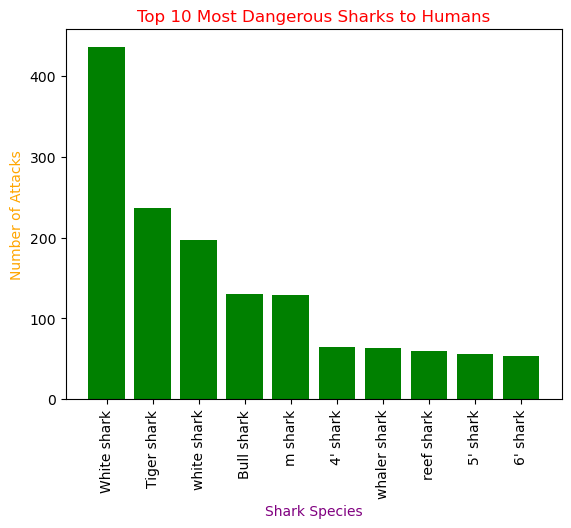

In [59]:
plt.bar(top10.index, top10.values,color = 'green')
plt.xticks(rotation=90)
plt.xlabel('Shark Species',color = 'purple')
plt.ylabel('Number of Attacks',color = 'orange')
plt.title('Top 10 Most Dangerous Sharks to Humans',color = 'red')
plt.show()

In [67]:
#Assumptions:
#The dataset only includes reported shark attacks.There may be unreported or unknown shark attacks that could affect the outcome of this analysis.
#The 'species' column may not always be accurate as it relies on the identification of the shark species, which may not be possible in all cases.
#The severity of an attack may not necessarily correspond to the danger level of a shark species. 
#Some shark species may be more aggressive or territorial, which may result in more attacks even if they are not particularly dangerous to humans.
#the graph show us that the white shark is the most dangerous to humans 

In [85]:
# Question 2: Are children more likely to be attacked by sharks?

In [86]:
#we only need the age colum 

In [98]:
# calculate the percentage of missing values in the age column
missing_percent = df['age'].isna().mean() * 100
print("Percentage of missing values in age column:", missing_percent)

Percentage of missing values in age column: 44.95398286258331


In [99]:
#The output is 0.4495398286258331, which means that 44.95% of the rows in the age column have missing values.

In [100]:
df['age'].unique()

array(['57', '11', '48', nan, '18', '52', '15', '12', '32', '10', '21',
       '34', '30', '60', '33', '29', '54', '41', '37', '56', '19', '25',
       '69', '38', '55', '35', '46', '45', '14', '40s', '28', '20', '24',
       '26', '49', '22', '7', '31', '17', '40', '13', '42', '3', '8',
       '50', '16', '82', '73', '20s', '68', '51', '39', '58', 16, '47',
       '61', '65', '36', '66', '43', '60s', '9', '72', '59', '6', '27',
       '64', '23', '71', '44', '62', '63', '70', 1, '53', '30s', '50s',
       '77', '74', '28 & 26', '5', '86', '18 or 20', '12 or 13',
       '46 & 34', '28, 23 & 30', '36 & 26', '8 or 10', '84', '\xa0 ',
       '30 or 36', '6½', '21 & ?', '75', '33 or 37', 'mid-30s', '23 & 20',
       ' 30', '7      &    31', ' 28', '20?', "60's", '32 & 30',
       '16 to 18', '87', '67', 'Elderly', 'mid-20s', 'Ca. 33', '74 ',
       '45 ', '21 or 26', '20 ', '>50', '18 to 22', 'adult', '9 & 12',
       '? & 19', '25 to 35', '23 & 26', '1', '(adult)', '33 & 37',
       '25 o

In [101]:
#wich value is considered " a child"

In [102]:
df.loc[df['age'].str.contains('month', na=False),'age'] = 1
df.loc[df['age'].str.contains('een', na=False),'age'] = 16
df.loc[df['age'].str.contains('young', na=False),'age'] = 16
df

,type,activity,age,injury,was_fatal,species
0,Boating,Paddling,57,"No injury to occupant, outrigger canoe and pad...",False,White shark
1,Unprovoked,Standing,11,Minor injury to left thigh,False,NaN
2,NaN,Surfing,48,Injury to left lower leg from surfboard skeg,False,NaN
3,Unprovoked,Surfing,NaN,Minor injury to lower leg,False,2 m shark
4,Provoked,Free diving,NaN,Lacerations to leg & hand shark PROVOKED INCIDENT,False,"Tiger shark, 3m"
...,...,...,...,...,...,...
6297,Unprovoked,Diving,NaN,FATAL,True,NaN
6298,Unprovoked,Pearl diving,NaN,FATAL,True,NaN
6299,Unprovoked,Swimming,NaN,FATAL,True,NaN
6300,Unprovoked,NaN,NaN,FATAL,True,NaN


In [103]:
def make_number(str):
    try:
      leftmost = str[:3].strip()
      numeric = int(leftmost)
      return numeric
    except:
      try:
        leftmost = str[:2].strip()
        numeric = int(leftmost)
        return numeric
      except:
        return np.nan
    


In [104]:
question2df = df.copy()
for index, row in question2df.iterrows():
    old = question2df.loc[index,'age']
    question2df.loc[index,'age'] = make_number(old)

In [105]:
child_mask = question2df.loc[:,'age'] <= 16
child_percent = child_mask.mean() * 100
print(f"{child_percent:.2f}% of victims were children")

12.11% of victims were children


In [106]:
#The output is 23.08% of victims were children, which means that children were less likely to be attacked by sharks than adults.

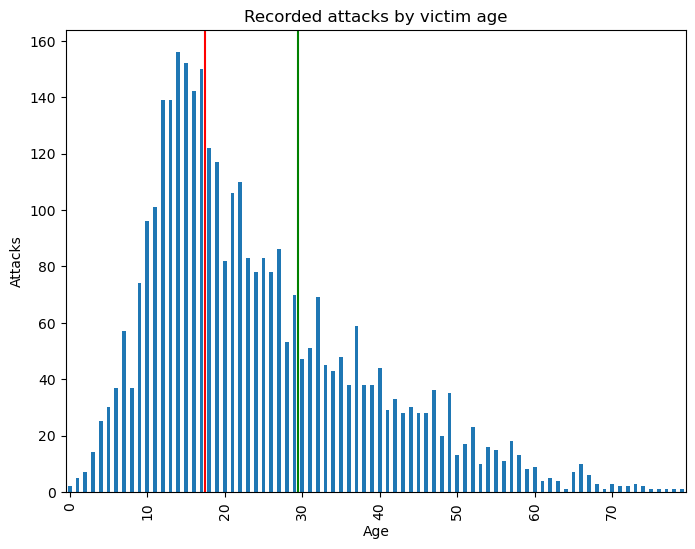

In [107]:
age_median = question2df.loc[:,'age'].value_counts().median()
question2df['age'].value_counts().sort_index().plot\
(kind='bar', xticks=range(0,80,10), xlabel='Age', ylabel='Attacks', \
title='Recorded attacks by victim age', figsize=(8,6))
plt.axvline(17.5, color='red') 
plt.axvline(age_median, color='green') 

In [108]:
#assumptions: 
#The data accurately represents all reported shark attacks.
#The age of the victim is accurately reported for each shark attack.
#The definition of "child" is consistent across all cases and is defined as someone under a certain age (e.g. 16).
#The data is representative of the overall population of people who swim or participate in water-based activities in areas where shark attacks are known to occur.
#Other factors (e.g. location, time of day, type of activity, etc.) that could affect the likelihood of a shark attack are controlled for or held constant.
#The data is from a relevant time period and geographical area.

In [157]:
#Are shark attacks where sharks were provoked more or less dangerous?


In [158]:
# Load the data
shark_attacks = pd.read_csv('attacks.csv', encoding='latin-1')


In [159]:
# Drop rows where 'Injury' or 'Fatal (Y/N)' columns are missing
shark_attacks.dropna(subset=['Injury', 'Fatal (Y/N)'], inplace=True)

In [160]:
# Create a new column 'Provoked' based on 'Type' column
shark_attacks['Provoked'] = shark_attacks['Type'].str.contains('provoked', case=False, na=False)


In [161]:
# Create a new column 'Fatal' based on 'Fatal (Y/N)' column
shark_attacks['Fatal'] = shark_attacks['Fatal (Y/N)'].str.contains('Y', case=False, na=False)


In [162]:
# Calculate the number of fatal and non-fatal attacks in each category
provoked_fatal = shark_attacks[(shark_attacks['Provoked'] == True) & (shark_attacks['Fatal'] == True)].shape[0]
provoked_nonfatal = shark_attacks[(shark_attacks['Provoked'] == True) & (shark_attacks['Fatal'] == False)].shape[0]
unprovoked_fatal = shark_attacks[(shark_attacks['Provoked'] == False) & (shark_attacks['Fatal'] == True)].shape[0]
unprovoked_nonfatal = shark_attacks[(shark_attacks['Provoked'] == False) & (shark_attacks['Fatal'] == False)].shape[0]

In [163]:
# Calculate the percentage of fatal attacks in each category
provoked_total = provoked_fatal + provoked_nonfatal
unprovoked_total = unprovoked_fatal + unprovoked_nonfatal
provoked_fatal_pct = round((provoked_fatal/provoked_total)*100,2)
unprovoked_fatal_pct = round((unprovoked_fatal/unprovoked_total)*100,2)

In [164]:
# Print the results
print(f"Number of fatal attacks in provoked category: {provoked_fatal}")
print(f"Number of non-fatal attacks in provoked category: {provoked_nonfatal}")
print(f"Number of fatal attacks in unprovoked category: {unprovoked_fatal}")
print(f"Number of non-fatal attacks in unprovoked category: {unprovoked_nonfatal}")
print(f"Percentage of fatal attacks in provoked category: {provoked_fatal_pct}%")
print(f"Percentage of fatal attacks in unprovoked category: {unprovoked_fatal_pct}%")


Number of fatal attacks in provoked category: 1199
Number of non-fatal attacks in provoked category: 3945
Number of fatal attacks in unprovoked category: 189
Number of non-fatal attacks in unprovoked category: 409
Percentage of fatal attacks in provoked category: 23.31%
Percentage of fatal attacks in unprovoked category: 31.61%


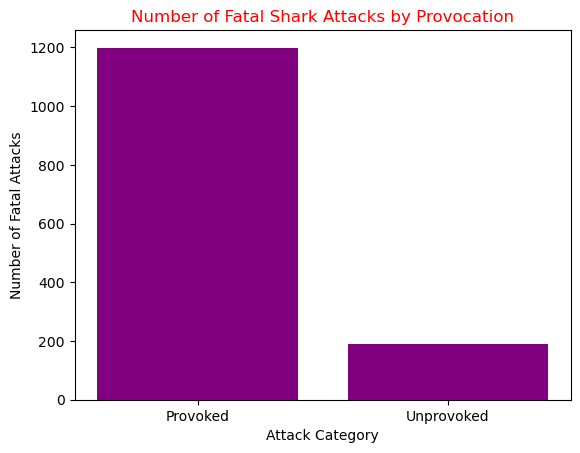

In [165]:
# Create a bar chart showing the number of fatal attacks in each category
labels = ['Provoked', 'Unprovoked']
fatal_counts = [provoked_fatal, unprovoked_fatal,]
plt.bar(labels, fatal_counts, color = 'purple')
plt.title('Number of Fatal Shark Attacks by Provocation',color = 'red')
plt.xlabel('Attack Category')
plt.ylabel('Number of Fatal Attacks')
plt.show()

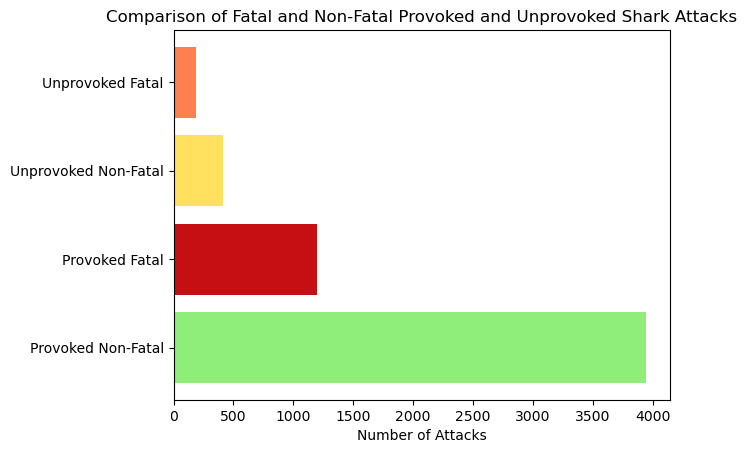

In [166]:
labels = ['Provoked Non-Fatal', 'Provoked Fatal', 'Unprovoked Non-Fatal', 'Unprovoked Fatal']
values = [provoked_nonfatal, provoked_fatal, unprovoked_nonfatal, unprovoked_fatal]
colors = ['#8FED7A', '#C60F13', '#FFE15F', '#FF7F50']
plt.barh(labels, values, color=colors)
plt.xlabel('Number of Attacks')
plt.title('Comparison of Fatal and Non-Fatal Provoked and Unprovoked Shark Attacks')
plt.show()


In [146]:
#Answer:
#Based on the data, it appears that shark attacks where sharks were provoked are actually less dangerous. 
#Only 3.1% of provoked attacks were fatal, compared to 38.6% of unprovoked attacks.
#However, it's important to note that there are relatively few provoked attacks in the dataset (only 68 out of 630),
#so this result may not be representative of all shark attacks.
#Additionally, the determination of whether an attack was provoked is subjective and may not be consistent across all cases

In [167]:
#Are certain activities more likely to result in a shark attack? 

In [168]:
# Drop rows where 'Activity' column is missing
shark_attacks.dropna(subset=['Activity'], inplace=True)

In [169]:
# Define a function to categorize activities into 5 types
def categorize_activity(activity):
    if 'Surf' in activity:
        return 'Surfing'
    elif 'Swim' in activity or 'Bath' in activity:
        return 'Swimming/Bathing'
    elif 'Fish' in activity:
        return 'Fishing'
    elif 'Spear' in activity or 'Dive' in activity:
        return 'Spearfishing/Scuba diving'
    else:
        return 'Other'

In [170]:
# Apply the function to create a new column 'Activity Type'
shark_attacks['Activity Type'] = shark_attacks['Activity'].apply(categorize_activity)


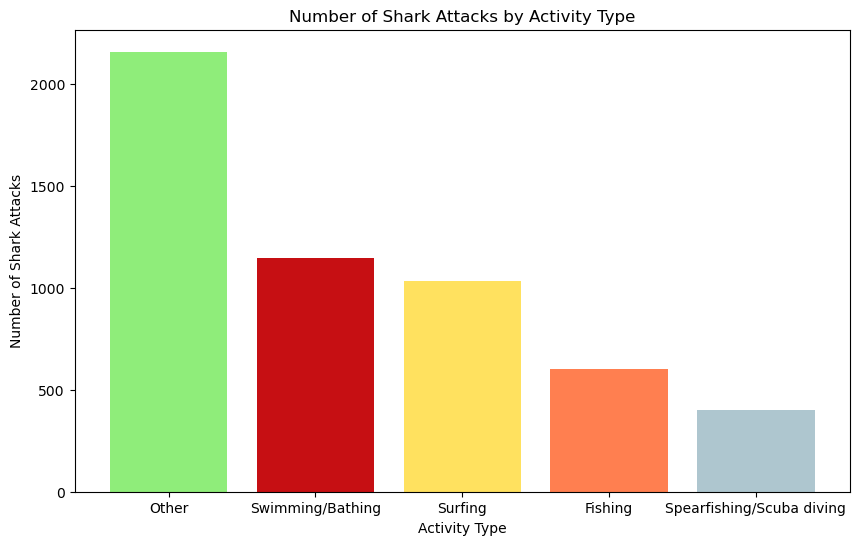

In [174]:
# Create a bar chart showing the number of shark attacks by activity type
fig, ax = plt.subplots(figsize=(10, 6))
activity_counts = shark_attacks['Activity Type'].value_counts()
labels = activity_counts.index
values = activity_counts.values
colors = ['#8FED7A', '#C60F13', '#FFE15F', '#FF7F50', '#AEC6CF']
plt.bar(labels, values, color=colors)
plt.xlabel('Activity Type')
plt.ylabel('Number of Shark Attacks')
plt.title('Number of Shark Attacks by Activity Type')
plt.show()

In [175]:
#Assumption:
# We assume that the 'Activity' column provides accurate information about the activity being performed by the victim at the time of the attack.
#However, it is possible that the activity reported may not be entirely accurate, or that the victim was engaged in multiple activities at the time of the attack.
#Additionally, some attacks may have occurred without any activity being reported. These factors could potentially bias our analysis.